In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

from collections import Counter

%matplotlib inline

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

Im going to take only the last 5 seasons, to get insights

In [3]:
df_15_16 = pd.read_csv('./data/season15-16.csv', index_col='Date')
df_16_17 = pd.read_csv('./data/season16-17.csv', index_col='Date')
df_17_18 = pd.read_csv('./data/season17-18.csv', index_col='Date')
df_18_19 = pd.read_csv('./data/season18-19.csv', index_col='Date')
df_19_20 = pd.read_csv('./data/season19-20.csv', index_col='Date')

all_dates = pd.read_csv('./data/clean_matches.csv')

In [14]:
all_dates

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,AC,HY,AY,HR,AR,Attendance,HHW,AHW,HO,AO
0,2000-08-19,Tottenham,Ipswich,3,1,H,2,1,H,Alan Wiley,...,4,0,0,0,0,36148.0,2.0,1.0,2.0,3.0
1,2000-08-19,Charlton,Man City,4,0,H,2,0,H,Rob Harris,...,6,1,2,0,0,20043.0,2.0,1.0,8.0,6.0
2,2000-08-19,Chelsea,West Ham,4,2,H,1,0,H,Graham Barber,...,7,1,2,0,0,34914.0,1.0,0.0,2.0,3.0
3,2000-08-19,Coventry,Middlesbrough,1,3,A,1,1,D,Barry Knight,...,4,5,3,1,0,20624.0,0.0,1.0,1.0,3.0
4,2000-08-19,Derby,Southampton,2,2,D,1,2,A,Andy D'Urso,...,8,1,1,0,0,27223.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7170,2020-07-26,Man City,Norwich,5,0,H,2,0,H,C Pawson,...,0,1,1,0,0,NaN,NaN,NaN,NaN,NaN
7171,2020-07-26,Newcastle,Liverpool,1,3,A,1,1,D,A Taylor,...,4,1,0,0,0,NaN,NaN,NaN,NaN,NaN
7172,2020-07-26,Southampton,Sheffield United,3,1,H,0,1,A,P Bankes,...,1,0,1,0,0,NaN,NaN,NaN,NaN,NaN
7173,2020-07-26,West Ham,Aston Villa,1,1,D,0,0,D,M Oliver,...,7,2,1,0,0,NaN,NaN,NaN,NaN,NaN


In [4]:
# merging all seasons based on dates

df = all_dates.loc[all_dates['Date'] >= '2015-08-08']
df

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,AC,HY,AY,HR,AR,Attendance,HHW,AHW,HO,AO
5275,2015-08-08,Chelsea,Swansea,2,2,D,2,1,H,M Oliver,...,8,1,3,1,0,NaN,NaN,NaN,NaN,NaN
5276,2015-08-08,Everton,Watford,2,2,D,0,1,A,M Jones,...,2,1,2,0,0,NaN,NaN,NaN,NaN,NaN
5277,2015-08-08,Leicester,Sunderland,4,2,H,3,0,H,L Mason,...,3,2,4,0,0,NaN,NaN,NaN,NaN,NaN
5278,2015-08-08,Bournemouth,Aston Villa,0,1,A,0,0,D,M Clattenburg,...,3,3,4,0,0,NaN,NaN,NaN,NaN,NaN
5279,2015-08-08,Man United,Tottenham,1,0,H,1,0,H,J Moss,...,2,2,3,0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7170,2020-07-26,Man City,Norwich,5,0,H,2,0,H,C Pawson,...,0,1,1,0,0,NaN,NaN,NaN,NaN,NaN
7171,2020-07-26,Newcastle,Liverpool,1,3,A,1,1,D,A Taylor,...,4,1,0,0,0,NaN,NaN,NaN,NaN,NaN
7172,2020-07-26,Southampton,Sheffield United,3,1,H,0,1,A,P Bankes,...,1,0,1,0,0,NaN,NaN,NaN,NaN,NaN
7173,2020-07-26,West Ham,Aston Villa,1,1,D,0,0,D,M Oliver,...,7,2,1,0,0,NaN,NaN,NaN,NaN,NaN


Here we have selected only our last 5 seasons to see a less generical
report of the league, with new tv rights and teams making more money out
of it showing results from early 2000's might be deceaving

In [19]:
df.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,...,AC,HY,AY,HR,AR,Attendance,HHW,AHW,HO,AO
count,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,...,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,0.0,0.0,0.0,0.0,0.0
mean,1.541053,1.203158,0.673158,0.535789,13.873684,11.250526,4.680526,3.884737,10.395263,10.977368,...,4.730000,1.556842,1.711579,0.054211,0.067368,NaN,NaN,NaN,NaN,NaN
std,1.293195,1.186101,0.843159,0.751536,5.693954,4.863419,2.662030,2.329127,3.426514,3.542269,...,2.715246,1.229543,1.255204,0.237833,0.254891,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,2.000000,8.000000,9.000000,...,3.000000,1.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,1.000000,1.000000,0.000000,0.000000,13.000000,11.000000,4.000000,4.000000,10.000000,11.000000,...,4.000000,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
75%,2.000000,2.000000,1.000000,1.000000,17.000000,14.000000,6.000000,5.000000,13.000000,13.000000,...,6.000000,2.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
max,8.000000,9.000000,5.000000,5.000000,37.000000,30.000000,17.000000,15.000000,24.000000,26.000000,...,16.000000,6.000000,9.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN


In [20]:
df.isnull().sum()

Date             0
HomeTeam         0
AwayTeam         0
FTHG             0
FTAG             0
FTR              0
HTHG             0
HTAG             0
HTR              0
Referee          0
HS               0
AS               0
HST              0
AST              0
HF               0
AF               0
HC               0
AC               0
HY               0
AY               0
HR               0
AR               0
Attendance    1900
HHW           1900
AHW           1900
HO            1900
AO            1900
dtype: int64

In [44]:
df.shape

(1900, 28)

In [45]:
df.columns
#some columns we dont need since theres no data in them

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
       'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC',
       'HY', 'AY', 'HR', 'AR', 'Attendance', 'HHW', 'AHW', 'HO', 'AO',
       'Winner'],
      dtype='object')

In [5]:
df = df.drop(['Attendance', 'HHW', 'AHW', 'HO', 'AO'], axis=1)

## Games played as home team and away team

In [6]:
htmc = Counter(df.HomeTeam)
homegame = pd.Series(htmc)
homegame.sort_values(ascending=False)

West Ham            95
Crystal Palace      95
Everton             95
Leicester           95
Bournemouth         95
Man United          95
Arsenal             95
Southampton         95
Watford             95
Tottenham           95
Chelsea             95
Man City            95
Liverpool           95
Newcastle           76
Burnley             76
West Brom           57
Brighton            57
Stoke               57
Swansea             57
Aston Villa         38
Sunderland          38
Norwich             38
Huddersfield        38
Wolves              38
Cardiff             19
Middlesbrough       19
Hull                19
Fulham              19
Sheffield United    19
dtype: int64

We have here the matches played as a home team

In [7]:
atmc = Counter(df.AwayTeam)
awaygame = pd.Series(atmc)
awaygame.sort_values(ascending=False)

Leicester           95
Everton             95
Watford             95
Tottenham           95
Crystal Palace      95
West Ham            95
Southampton         95
Liverpool           95
Bournemouth         95
Chelsea             95
Arsenal             95
Man City            95
Man United          95
Burnley             76
Newcastle           76
Swansea             57
West Brom           57
Stoke               57
Brighton            57
Norwich             38
Huddersfield        38
Aston Villa         38
Sunderland          38
Wolves              38
Fulham              19
Hull                19
Middlesbrough       19
Cardiff             19
Sheffield United    19
dtype: int64

Here games as away team

In [8]:
df['Winner'] = 'Draw'
df.head()

#making a new column and putting all games as draws to then
#change them and assign them a winner

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,Winner
5275,2015-08-08,Chelsea,Swansea,2,2,D,2,1,H,M Oliver,...,10,15,16,4,8,1,3,1,0,Draw
5276,2015-08-08,Everton,Watford,2,2,D,0,1,A,M Jones,...,5,7,13,8,2,1,2,0,0,Draw
5277,2015-08-08,Leicester,Sunderland,4,2,H,3,0,H,L Mason,...,5,13,17,6,3,2,4,0,0,Draw
5278,2015-08-08,Bournemouth,Aston Villa,0,1,A,0,0,D,M Clattenburg,...,3,13,13,6,3,3,4,0,0,Draw
5279,2015-08-08,Man United,Tottenham,1,0,H,1,0,H,J Moss,...,4,12,12,1,2,2,3,0,0,Draw


In [9]:
df['Winner'][df['FTR'] == 'H']=df['HomeTeam']
df['Winner'][df['FTR'] == 'A']=df['AwayTeam']

#making them put the name of the winner on the column

/home/emmanuel/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/emmanuel/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,Winner
5275,2015-08-08,Chelsea,Swansea,2,2,D,2,1,H,M Oliver,...,10,15,16,4,8,1,3,1,0,Draw
5276,2015-08-08,Everton,Watford,2,2,D,0,1,A,M Jones,...,5,7,13,8,2,1,2,0,0,Draw
5277,2015-08-08,Leicester,Sunderland,4,2,H,3,0,H,L Mason,...,5,13,17,6,3,2,4,0,0,Leicester
5278,2015-08-08,Bournemouth,Aston Villa,0,1,A,0,0,D,M Clattenburg,...,3,13,13,6,3,3,4,0,0,Aston Villa
5279,2015-08-08,Man United,Tottenham,1,0,H,1,0,H,J Moss,...,4,12,12,1,2,2,3,0,0,Man United


## Percentange of wins

Text(0.5, 1.0, 'Win Percentange Home and Away')

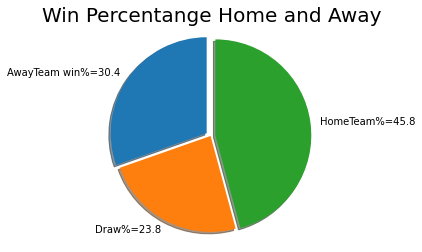

In [17]:
x = 100*df.groupby('FTR').count()['HomeTeam']/len(df)

plt.pie(x, explode=[.05, 0, .05], labels=['AwayTeam win%='+str(x.iloc[0].round(1)),
       'Draw%='+str(x.iloc[1].round(1)), 'HomeTeam%='+str(x.iloc[2].round(1))],
       startangle=90, shadow=True)

plt.axis('equal')
plt.title('Win Percentange Home and Away', fontsize=20)

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

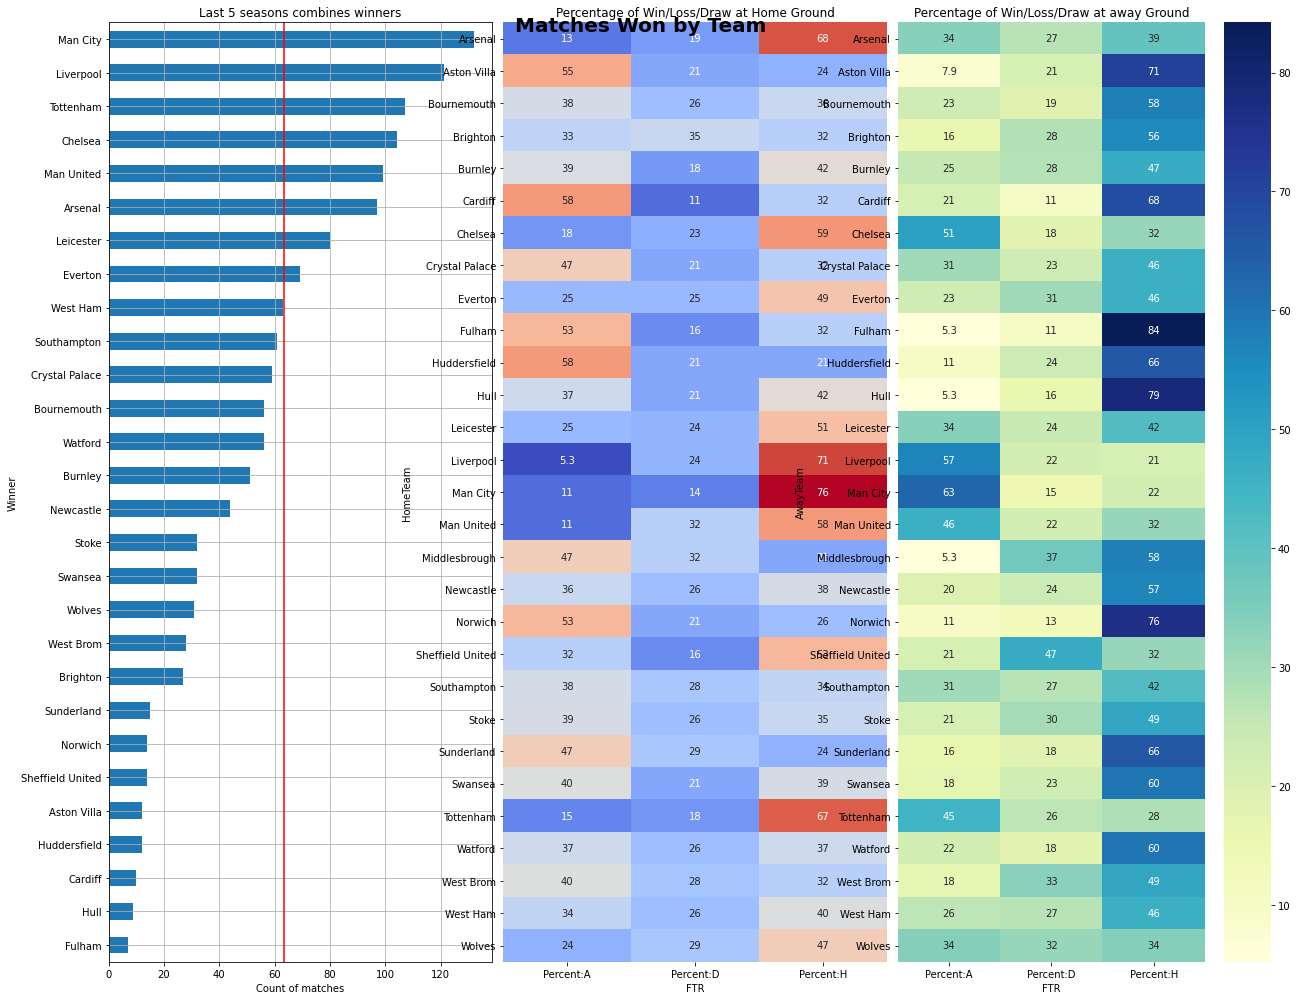

In [18]:
plt.figure(figsize=(18,14))
plt.subplots_adjust(hspace=0.2, wspace=0.4)
plt.suptitle('Matches Won by Team ', fontsize=20, fontweight='bold')


plt.subplot(1,3,1)
df.groupby('Winner').count()['FTR'].sort_values(ascending=True).iloc[1:-1].plot(kind='barh',grid=True)
plt.axvline(np.mean(df.groupby('Winner').count()['FTR']), color='r')

plt.title('Last 5 seasons combines winners')
plt.xlabel('Count of matches')
plt.tight_layout()

plt.subplot(1,3,2)
df_home =df.pivot_table(values='AwayTeam', index='HomeTeam', columns='FTR', aggfunc='count')
Total=df_home.sum(axis=1)
for x in df_home.columns.tolist():
    df_home['Percent:'+x]=100*df_home[x]/Total
sns.heatmap(df_home[['Percent:A', 'Percent:D', 'Percent:H']], cmap='coolwarm', annot=True, cbar=False)
plt.title('Percentage of Win/Loss/Draw at Home Ground')


plt.subplot(1,3,3)
df_away = df.pivot_table(values='HomeTeam', index='AwayTeam', columns='FTR',aggfunc='count')
Total = df_away.sum(axis=1)

for x in df_away.columns.tolist():
    df_away['Percent:'+x]=100*df_away[x]/Total
sns.heatmap(df_away[['Percent:A', 'Percent:D', 'Percent:H']], cmap='YlGnBu', annot=True)
plt.title('Percentage of Win/Loss/Draw at away Ground')
plt.tight_layout

## Goals made Home and away

In [23]:
df_goal = df.pivot_table(values=['FTHG', 'FTAG'], index='HomeTeam', columns='AwayTeam', aggfunc='sum')


Text(0.5, 1.0, 'Goals as Visitors')

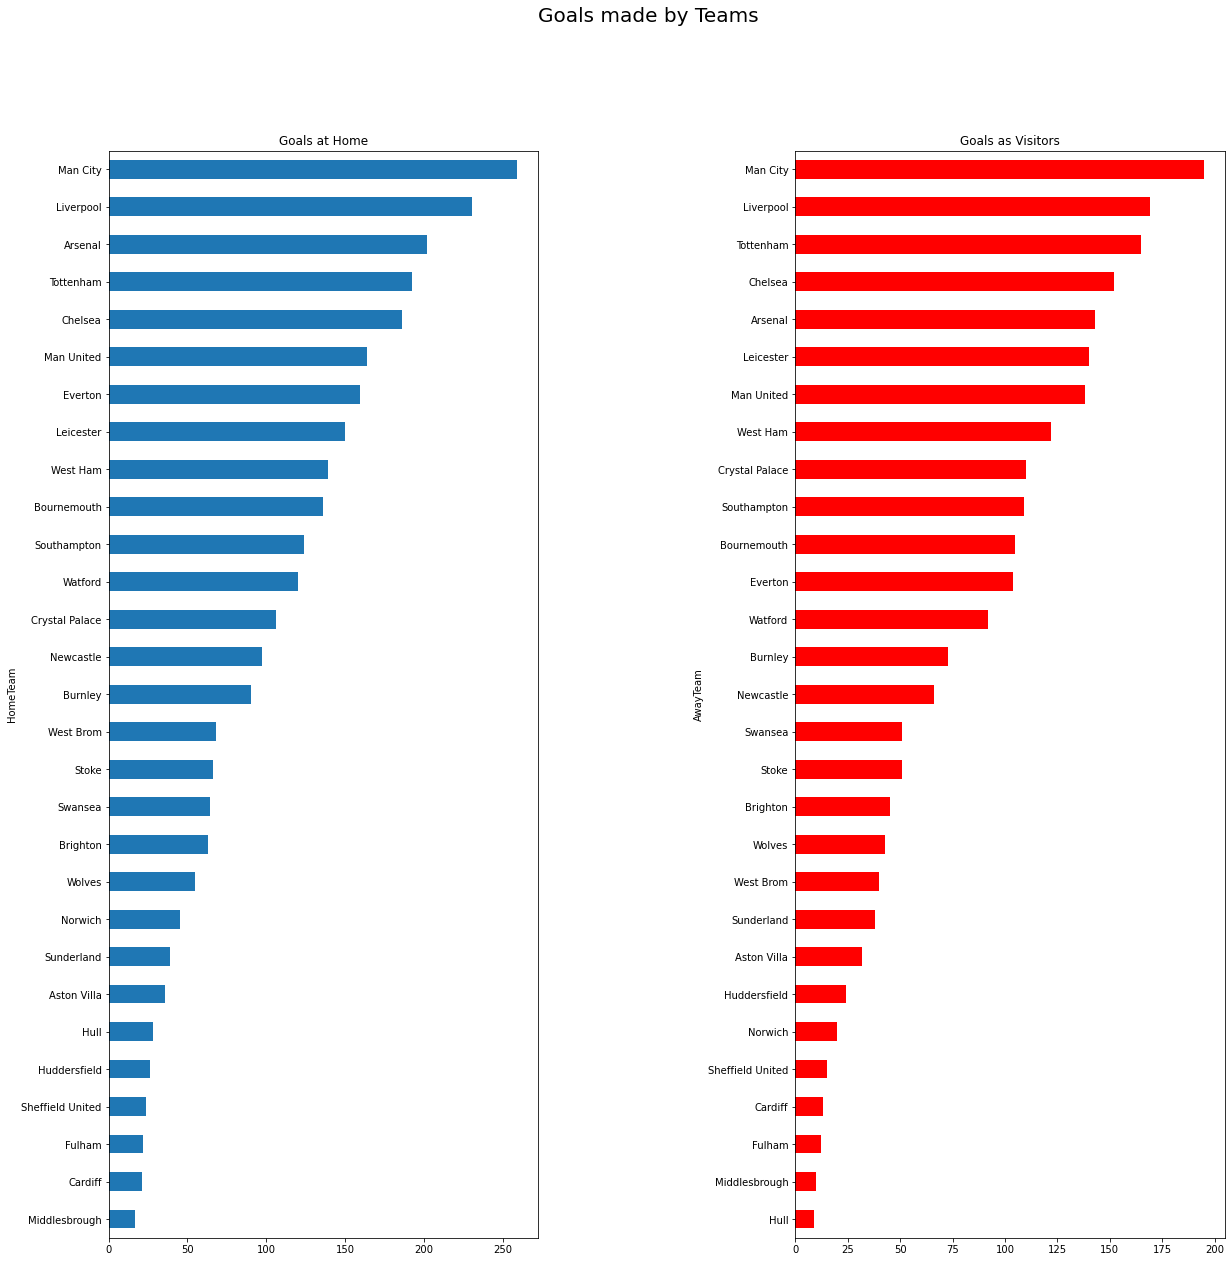

In [24]:
plt.figure(figsize=(20,20))
plt.subplots_adjust(wspace=.6)
plt.suptitle('Goals made by Teams', fontsize=20)
plt.subplot(1,2,1)
df_goal.xs('FTHG', level=0, axis=1).sum(axis=1).sort_values(ascending=True).plot(kind='barh')
plt.title('Goals at Home')

plt.subplot(1,2,2)
df_goal.xs('FTAG', level=0, axis=1).sum(axis=0).sort_values().plot(kind='barh',color='r')
plt.title('Goals as Visitors')

Here the graph can be decieving, we can think that teams score amost as much at
home and away but it clear that scoring as visitors is way harder than
scoring at home

## Correlations between variables

In [25]:
h_df = df.pivot_table(values=['FTHG','HST','HF','HC','HY','HR'], index='HomeTeam', aggfunc=np.mean)
h_df['Team']='HomeTeam'
h_df.rename(index=str, columns={'FTHG':'Goal','HC':'Corner','HF':'Foul','HR':'Red_Card','HST':'Shot_Target',
                                      'HY':'Yellow_Card'}, inplace=True)
h_df

aw_df = df.pivot_table(values=['FTHG','HST','HF','HC','HY','HR'], index='AwayTeam', aggfunc=np.mean)
aw_df['Team']='AwayTeam'
aw_df.rename(index=str, columns={'FTHG':'Goal','HC':'Corner','HF':'Foul','HR':'Red_Card','HST':'Shot_Target',
                                      'HY':'Yellow_Card'}, inplace=True)
all_df=pd.concat([h_df, aw_df], axis=0, ignore_index=False)

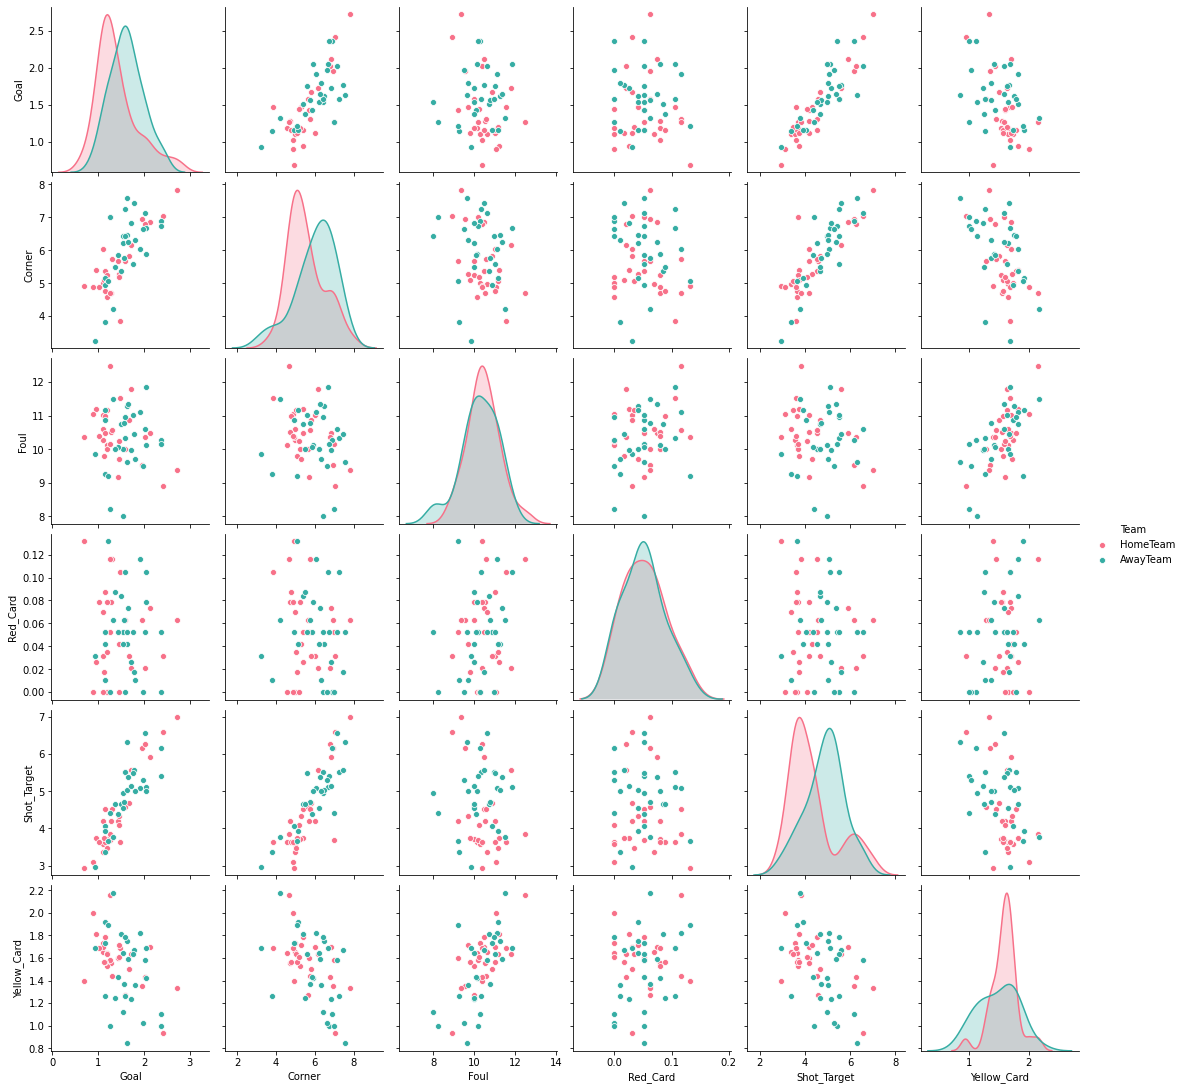

In [26]:
sns.pairplot(all_df, hue='Team', palette='husl', kind='scatter')
plt.show()

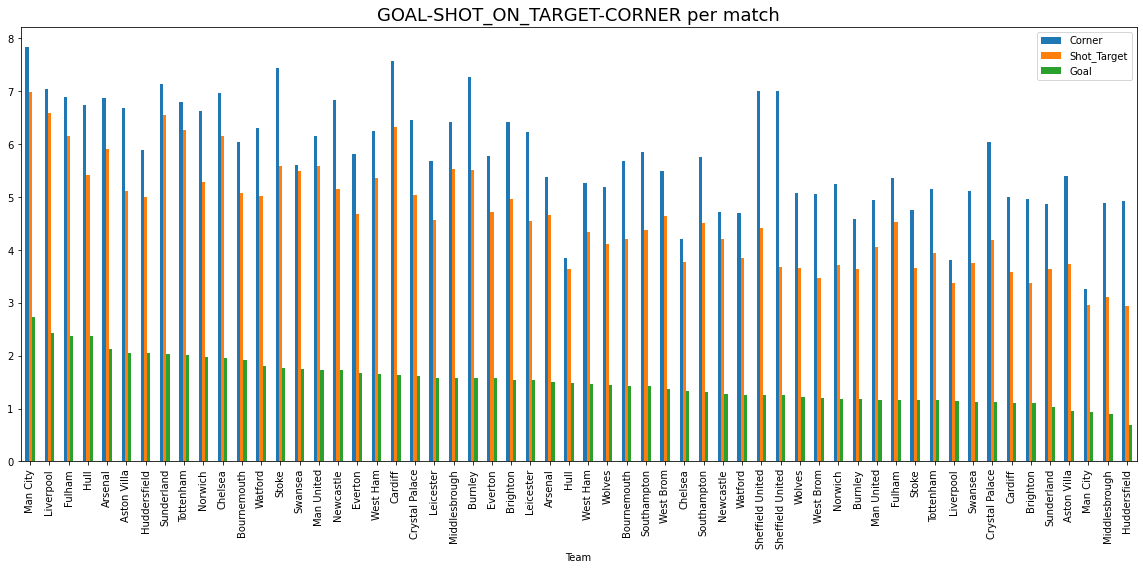

In [29]:
all_df.sort_values('Goal', ascending=False, inplace=True)
all_df[['Corner', 'Shot_Target', 'Goal']].plot(kind='bar', figsize=(20,8),label=all_df.index)
plt.xlabel('Team')
a=np.arange(len(all_df))

plt.title('GOAL-SHOT_ON_TARGET-CORNER per match', fontsize=18)
plt.show()

## Result at half time changes at full time??

Text(0, 0.5, 'Count')

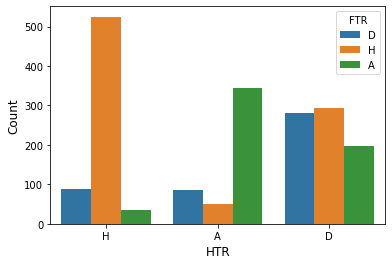

In [33]:
sns.countplot(data=df, x='HTR', hue='FTR')

plt.xlabel('HTR', size=12)
plt.ylabel('Count', size=12)

A : Away team leading at Half Time.

D : The game was level at Half Time.

    1. Blue shows the team  won the game.
    2. Orange shows the team drew the game at full time.
    3. Green shows the team lost the game at full time.

The team leading at halftime alsmost ends up winning the game.
If the game is leveled at half time most of the times the game will end up
in a draw or home team will go on to win it.


So Half time result it is very important to determine who wins at full time